# Stock Sentiment Analysis using News Headlines
Dataset:
- The first column is "Date", the second is "Label", and the following ones are news headlines ranging from "Top1" to "Top25".
Task: To predict the stock by analysing top 25 news headlines
Label: 
- 1 = Up
- 0 = Down or No change

In [1]:
import pandas as pd
#Load Dataset
df=pd.read_csv("C:/Users/acer/Jupyter/Stock-Sentiment-Analysis-master/Data.csv", encoding = "ISO-8859-1")
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [3]:
# Removing punctuations
X=df.iloc[:,2:27]
X.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [2]:
# Convertng headlines to lower case
for index in df.iloc[:,2:27].columns:
    df[index]=df[index].str.lower()
df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title


In [4]:
#A sample to join all 25 headlines as one paragraph
' '.join(str(x) for x in df.iloc[1,2:27])

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

Lets Build a model on Bag of Words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer #for Bag of words
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

Splitting data into train and test
train consists all record before 31Dec2014

In [6]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
print(train.shape)
print(test.shape)

(3975, 27)
(378, 27)


In [7]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
data.shape

(3975, 25)

In [8]:
#Joining all top 25 headline in one paragraph for each date
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
len(headlines)

3975

In [9]:
## implement BAG OF WORDS (on Bigram only)
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)
traindataset.shape

(3975, 584289)

In [10]:
# implement RandomForest Classifier
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf1.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = rf1.predict(test_dataset)
test_dataset.shape

(378, 584289)

In [16]:
#Model Validation
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print('Accuracy Score: ',score)
roc_score=roc_auc_score(test['Label'],predictions)
print('ROC AUC Socre: ',roc_score)
report=classification_report(test['Label'],predictions)
print(report)

[[143  43]
 [ 15 177]]
Accuracy Score:  0.8465608465608465
ROC AUC Socre:  0.8453461021505376
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       186
           1       0.80      0.92      0.86       192

   micro avg       0.85      0.85      0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [22]:
#Saving ROC score in a list to compare
roc_matrix=[]
roc_matrix.append(roc_score)
roc_matrix

[0.8453461021505376]

In [18]:
#Implement Naive-Bayes model on bigram BoW
NB1=MultinomialNB().fit(traindataset,train['Label'])

In [19]:
predictions = NB1.predict(test_dataset)
test_dataset.shape

(378, 584289)

In [23]:
#Model Validation
#from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print('Accuracy Score: ',score)
roc_score=roc_auc_score(test['Label'],predictions)
print('ROC AUC Socre: ',roc_score)
report=classification_report(test['Label'],predictions)
print(report)

[[138  48]
 [ 10 182]]
Accuracy Score:  0.8465608465608465
ROC AUC Socre:  0.8449260752688171
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       186
           1       0.79      0.95      0.86       192

   micro avg       0.85      0.85      0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



In [24]:
roc_matrix.append(roc_score)
roc_matrix

[0.8453461021505376, 0.8449260752688171]

##### Now create a Bag of Model on all Unigram, Bigram and Trigram
i love data science
- unigram = 'i', 'love', 'data', 'science'
- bigram = 'i love', 'love data', 'data science'
- trigram = 'i love data', 'love data science'

In [25]:
## implement BAG OF WORDS (all unigram and bigram and trigram)
countvector=CountVectorizer(ngram_range=(1,3))
traindataset=countvector.fit_transform(headlines)
traindataset.shape

(3975, 1599545)

Build Model on above BoW, Note that number of columns is 1.6Million

In [26]:
#Build Naive Bayes model
NB2=MultinomialNB().fit(traindataset,train['Label'])

In [27]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = NB2.predict(test_dataset)
test_dataset.shape

(378, 1599545)

In [28]:
#Model Validation
#from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print('Accuracy Score: ',score)
roc_score=roc_auc_score(test['Label'],predictions)
print('ROC AUC Socre: ',roc_score)
report=classification_report(test['Label'],predictions)
print(report)

[[131  55]
 [  1 191]]
Accuracy Score:  0.8518518518518519
ROC AUC Socre:  0.849546370967742
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.78      0.99      0.87       192

   micro avg       0.85      0.85      0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



In [29]:
roc_matrix.append(roc_score)
roc_matrix

[0.8453461021505376, 0.8449260752688171, 0.849546370967742]

In [30]:
# implement RandomForest Classifier
rf2=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf2.fit(traindataset,train['Label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
#Prediction
predictions = rf2.predict(test_dataset)
test_dataset.shape

(378, 1599545)

In [32]:
#Model Validation
#from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print('Accuracy Score: ',score)
roc_score=roc_auc_score(test['Label'],predictions)
print('ROC AUC Socre: ',roc_score)
report=classification_report(test['Label'],predictions)
print(report)

[[139  47]
 [  9 183]]
Accuracy Score:  0.8518518518518519
ROC AUC Socre:  0.8502184139784947
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       186
           1       0.80      0.95      0.87       192

   micro avg       0.85      0.85      0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



In [33]:
roc_matrix.append(roc_score)
roc_matrix

[0.8453461021505376, 0.8449260752688171, 0.849546370967742, 0.8502184139784947]

In [35]:
roc_matrix1=pd.DataFrame(roc_matrix)

In [39]:
roc_matrix1.index=['rf1','NB1','NB2','rf2']
roc_matrix1.columns=['ROC Score']
roc_matrix1

,ROC Score
rf1,0.845346
NB1,0.844926
NB2,0.849546
rf2,0.850218


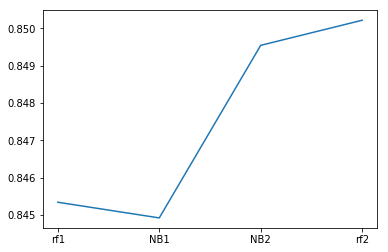

In [44]:
import matplotlib.pyplot as plt
plt.plot(roc_matrix1)

### Conclusion
1. Model on Bag of Words with combination of all unigram bigram and trigram have more ROC score 
2. Random forest classifier with trigram BoW has best result of ROC score 0.85